In [7]:
import pandas as pd
df=pd.read_excel('20160101-20190101(Daily).xlsx')

In [8]:
print(df.keys())
print(df.shape)

Index(['SO2', 'CO', 'O3', 'Nox', 'NO', 'NO2', 'THC', 'NMHC', 'CH4',
       'WindSpeed', 'TEMP', 'Humidity', 'PM25'],
      dtype='object')
(15178, 13)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15178 entries, 0 to 15177
Data columns (total 13 columns):
SO2          15178 non-null float64
CO           15178 non-null float64
O3           15178 non-null float64
Nox          15178 non-null int64
NO           15178 non-null float64
NO2          15178 non-null float64
THC          15178 non-null float64
NMHC         15178 non-null float64
CH4          15178 non-null float64
WindSpeed    15178 non-null float64
TEMP         15178 non-null float64
Humidity     15178 non-null float64
PM25         15178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 1.5 MB


In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [11]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [12]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [15]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 16.182061


In [17]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [18]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,25.304294,0.053062,25.315566,0.116513
1,23.629868,0.081599,23.649093,0.114085
2,22.143405,0.081729,22.178626,0.116731
3,20.859233,0.075983,20.913006,0.133645
4,19.764161,0.105539,19.842354,0.104777


In [19]:
print((cv_results["test-rmse-mean"]).tail(1))

49    13.292694
Name: test-rmse-mean, dtype: float64


In [20]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

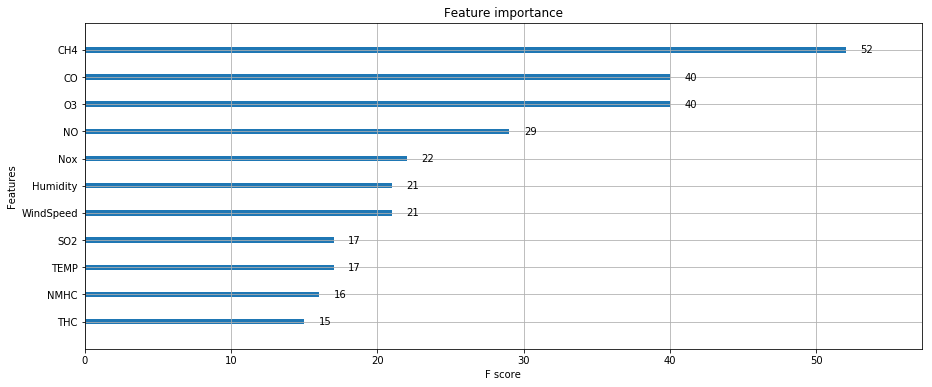

In [23]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15, 6]
plt.show()